In [7]:
import numpy as np

In [8]:
# Unperturbed energy level
E_0 = 1.0  # eV, changeable parameter
J = 1  # Total angular momentum quantum number

# Magnetic quantum numbers (m_J)
m_J = np.arange(-J, J + 1, 1)  # m_J = -1, 0, +1

# Zeeman effect parameters
mu_B = 5.788e-5  # Bohr magneton (eV/T)
g_factor = 2.0  # Landé g-factor
B_z = 500.0  # Magnetic field strength (Tesla), changeable parameter

# Compute Zeeman-split energy levels
delta_E_Zeeman = g_factor * mu_B * m_J * B_z
E_levels = E_0 + delta_E_Zeeman
print("Zeeman-split energy levels:", E_levels)

Zeeman-split energy levels: [0.94212 1.      1.05788]


In [9]:
# Assign equal intensity for all transitions
intensities = np.ones_like(E_levels) / 2
intensities[len(intensities) // 2] = 1

In [10]:
# Define a line shape function
def lorentzian_line_shape(E, E_0, width):
    return (width / np.pi) / ((E - E_0) ** 2 + width**2)


# Energy range for the spectrum
energy_range = np.linspace(E_levels.min() - 0.1, E_levels.max() + 0.1, 1000)  # eV
line_width = 0.0025  # Broadening width (eV)

# Build the absorption spectrum
absorption_spectrum = np.zeros_like(energy_range)
for energy, intensity in zip(E_levels, intensities):
    print(energy, intensity)
    absorption_spectrum += intensity * lorentzian_line_shape(
        energy_range, energy, line_width
    )

0.94212 0.5
1.0 1.0
1.05788 0.5


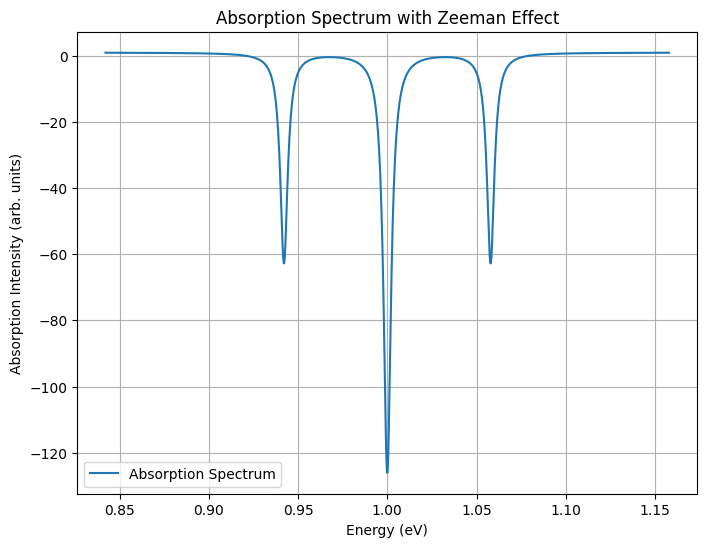

In [11]:
import matplotlib.pyplot as plt

# Plot the absorption spectrum
plt.figure(figsize=(8, 6))
plt.plot(energy_range, 1 - absorption_spectrum, label="Absorption Spectrum")
plt.xlabel("Energy (eV)")
plt.ylabel("Absorption Intensity (arb. units)")
plt.title("Absorption Spectrum with Zeeman Effect")
plt.legend()
plt.grid()
plt.show()